In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json

In [4]:
# Set seaborn style and color palette
sns.set_style("ticks")
sns.set_context("poster")
palette = sns.color_palette("colorblind")
FIG_SIZE = (10, 6)

## Figure 3: Scalability of Agent Importance 

In [5]:
scale_data_path = "minimal_experiment_data/scalability_data.json"

# Load data
with open(scale_data_path, "r") as f:
    data = json.load(f)

# Convert timestep keys from strings to integers
data = {
    metric_name: {
        int(num_agents): computation_times
        for num_agents, computation_times in metric_values.items()
    }
    for metric_name, metric_values in data.items()
}

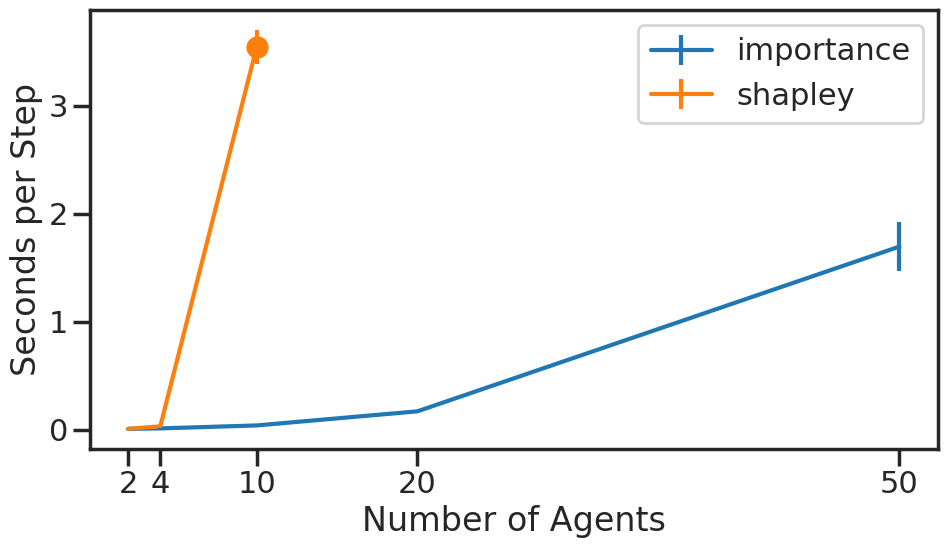

In [6]:
# Get the values fo the xticks for plotting.
# This will be the same for all methods.
x_ticks = list(data["baseline"].keys())

# Plotting
fig, ax = plt.subplots(figsize=FIG_SIZE)

for method, values in data.items():
    # skip the baseline
    if method == "baseline":
        continue
    x = []
    y = []
    error = []

    for i, (key, lst) in enumerate(values.items()):
        if lst:  # if the list is not empty
            x.append(key)
            y.append(np.mean(lst))
            error.append(np.std(lst))

    # plot lines and get line object
    if method == "shapley":
        line = ax.errorbar(x[:3], y[:3], yerr=error[:3], label=method, barsabove=True)
    else:
        line = ax.errorbar(x, y, yerr=error, label=method, barsabove=True)

    if method == "shapley":
        # get color from line object
        color = line[0].get_color()

        # plot marker with color from line
        ax.plot(x[2], y[2], "o", markersize=15, color=color)

ax.legend()
ax.set_xlabel("Number of Agents")
ax.set_ylabel("Seconds per Step")
plt.xticks(x_ticks)
plt.tight_layout()
plt.show()